# Exploratory Data Analysis (EDA)

Since we generate synthetic data for our model we use a different table of contents compared to the template.

## Table of Contents
1. [Notebook Preparation](#notebook-preparation)
2. [Data Generation](#data-generation)
3. [Data Visualisation](#data-visualisation)
4. [Data Storage (Discarded)](#data-storage)

## Notebook Preparation

If run remotely (e.g. on Google colab) we need to install some packages and also download our libraries

In [ ]:
# Use this to install potential missing packages
# %pip install seaborn

In [1]:
# Use this to download the matrix library from GitHub
# TODO: provide packaged matrixlib via GitHub

# Currently you'll have to manually upload the 'matrixlib' and 'modellib' to colab if tou want to run the notebook there.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import importlib  # use this to reload local packages if changes were made to prevent re-running the whole notebook

import matrixlib as mxl

## Data Generation

We generate three slightly different sets of matrices to show how these differences manifest in the visualised matrices.

In [2]:
# We first set sine global values used in the matrix generation
MATRIX_DIM = 64
NUMBER_OF_MATRICES = 100
DIAGONAL_BAND_RADIUS = 10
DETERMINANT_CUTOFF = 1e-05
RNG_SEED = 42

In [3]:
# We generate three sets to compare their generated matrices later

# Set 1 has the values presented in Götz & Anzt (2018).
set1_bgr_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.5))
set1_blk_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.5))
set1_blk_noise_bp = mxl.core.BlockProperties(size_range=(3, 32), size_average=10, size_std_dev=0.66, gap_chance=0.5)
set1_blk_tdata_vp = mxl.core.ValueProperties(density_range=(0.5, 0.7), value_range=(0.0, 1.0))
set1_blk_tdata_bp = mxl.core.BlockProperties(size_range=(2, 32), size_average=10, size_std_dev=0.66, gap_chance=0.0)

# Set 2 has a noise value range closer to the value range of the true data as well as different block size averages 
set2_bgr_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.9))
set2_blk_noise_vp = mxl.core.ValueProperties(density_range=(0.3, 0.5), value_range=(0.0, 0.9))
set2_blk_noise_bp = mxl.core.BlockProperties(size_range=(3, 32), size_average=14, size_std_dev=0.66, gap_chance=0.5)
set2_blk_tdata_vp = mxl.core.ValueProperties(density_range=(0.5, 0.7), value_range=(0.0, 1.0))
set2_blk_tdata_bp = mxl.core.BlockProperties(size_range=(2, 32), size_average=8, size_std_dev=0.66, gap_chance=0.0)

# Set 3 has much lower background noise density but denser noise blocks with lower values
set3_bgr_noise_vp = mxl.core.ValueProperties(density_range=(0.1, 0.3), value_range=(0.0, 0.5))
set3_blk_noise_vp = mxl.core.ValueProperties(density_range=(0.4, 0.6), value_range=(0.0, 0.3))
set3_blk_noise_bp = mxl.core.BlockProperties(size_range=(3, 32), size_average=10, size_std_dev=0.66, gap_chance=0.5)
set3_blk_tdata_vp = mxl.core.ValueProperties(density_range=(0.5, 0.7), value_range=(0.0, 1.0))
set3_blk_tdata_bp = mxl.core.BlockProperties(size_range=(2, 32), size_average=10, size_std_dev=0.66, gap_chance=0.0)

In [4]:
# Fix the seed value for reproducibility
np.random.seed(RNG_SEED)

# The three sets of matrices are generated
matrix_data_set1 = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=NUMBER_OF_MATRICES,
    background_noise_value_properties=set1_bgr_noise_vp,
    block_noise_value_properties=set1_blk_noise_vp, block_noise_block_properties=set1_blk_noise_bp,
    block_data_value_properties=set1_blk_tdata_vp, block_data_block_properties=set1_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False, band_padding_value=np.float32(np.NAN)
)

matrix_data_set2 = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=NUMBER_OF_MATRICES,
    background_noise_value_properties=set2_bgr_noise_vp,
    block_noise_value_properties=set2_blk_noise_vp, block_noise_block_properties=set2_blk_noise_bp,
    block_data_value_properties=set2_blk_tdata_vp, block_data_block_properties=set2_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False, band_padding_value=np.float32(np.NAN)
)

matrix_data_set3 = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=NUMBER_OF_MATRICES,
    background_noise_value_properties=set3_bgr_noise_vp,
    block_noise_value_properties=set3_blk_noise_vp, block_noise_block_properties=set3_blk_noise_bp,
    block_data_value_properties=set3_blk_tdata_vp, block_data_block_properties=set3_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False, band_padding_value=np.float32(np.NAN)
)

## Data Visualisation

[Present the matrices and their sub-components (blocks/noise).]


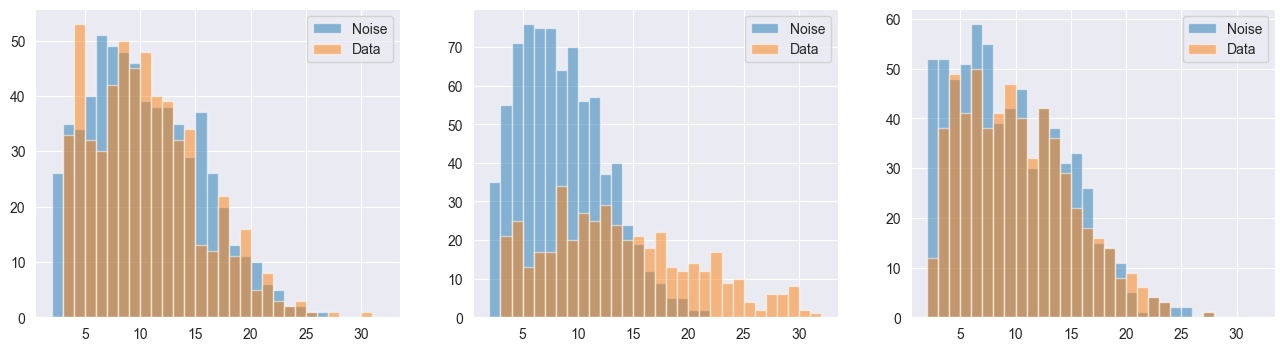

In [5]:
# Plot the histogram of the block sizes for the three sets
fig_blk_size_hist = plt.figure(1, figsize=(16, 4))

def get_bins(noise_bp: mxl.core.BlockProperties, tdata_bp: mxl.core.BlockProperties) -> list[int]:
    return list(range(min(noise_bp.len_min, tdata_bp.len_min), max(noise_bp.len_max, tdata_bp.len_max) + 1))

# data for set1
fig_blk_size_hist.add_subplot(131)
bins_set1 = get_bins(noise_bp=set1_blk_noise_bp, tdata_bp=set1_blk_tdata_bp)
plt.hist(matrix_data_set1.get_list_of_block_sizes("tdata"), bins=bins_set1, alpha=0.5, label='Noise')
plt.hist(matrix_data_set1.get_list_of_block_sizes("noise"), bins=bins_set1, alpha=0.5, label='Data' )
plt.legend(loc='upper right')
# data for set2
fig_blk_size_hist.add_subplot(132)
bins_set2 = get_bins(noise_bp=set2_blk_noise_bp, tdata_bp=set2_blk_tdata_bp)
plt.hist(matrix_data_set2.get_list_of_block_sizes("tdata"), bins=bins_set2, alpha=0.5, label='Noise')
plt.hist(matrix_data_set2.get_list_of_block_sizes("noise"), bins=bins_set2, alpha=0.5, label='Data' )
plt.legend(loc='upper right')
# data for set3
fig_blk_size_hist.add_subplot(133)
bins_set3 = get_bins(noise_bp=set3_blk_noise_bp, tdata_bp=set3_blk_tdata_bp)
plt.hist(matrix_data_set3.get_list_of_block_sizes("tdata"), bins=bins_set3, alpha=0.5, label='Noise')
plt.hist(matrix_data_set3.get_list_of_block_sizes("noise"), bins=bins_set3, alpha=0.5, label='Data' )
plt.legend(loc='upper right')

plt.show()

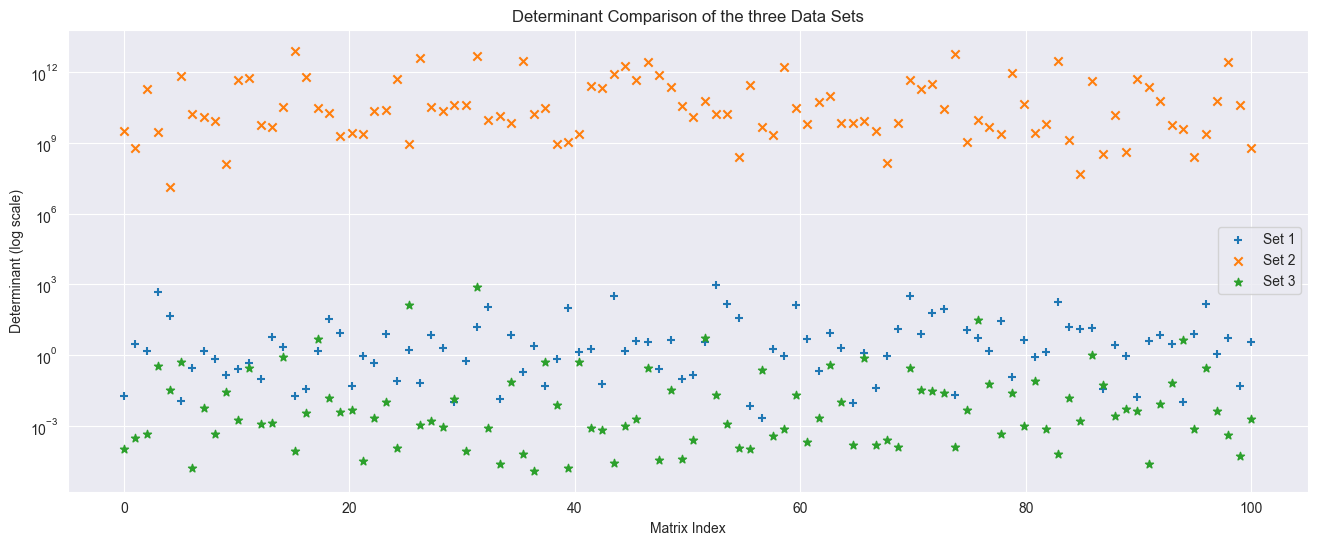

In [6]:
# Plot the determinants spread of the matrices for the three sets 
fig_det_scatter = plt.figure(2, figsize=(16, 6))
x_vals = np.linspace(0, 100, num=NUMBER_OF_MATRICES)

# data for set1
set1_determinants = [abs(matrix_data_set1.metadata[i].det) for i in range(matrix_data_set1.len)]
plt.scatter(x_vals, set1_determinants, label="Set 1", marker='+')
# data for set2
set2_determinants = [abs(matrix_data_set2.metadata[i].det) for i in range(matrix_data_set2.len)]
plt.scatter(x_vals, set2_determinants, label="Set 2", marker='x')
# data for set3
set3_determinants = [abs(matrix_data_set3.metadata[i].det) for i in range(matrix_data_set3.len)]
plt.scatter(x_vals, set3_determinants, label="Set 3", marker='*')

plt.xlabel('Matrix Index')
plt.ylabel('Determinant (log scale)')
plt.gca().set_yscale('log')
plt.title('Determinant Comparison of the three Data Sets')
plt.legend(loc='right')
plt.show()

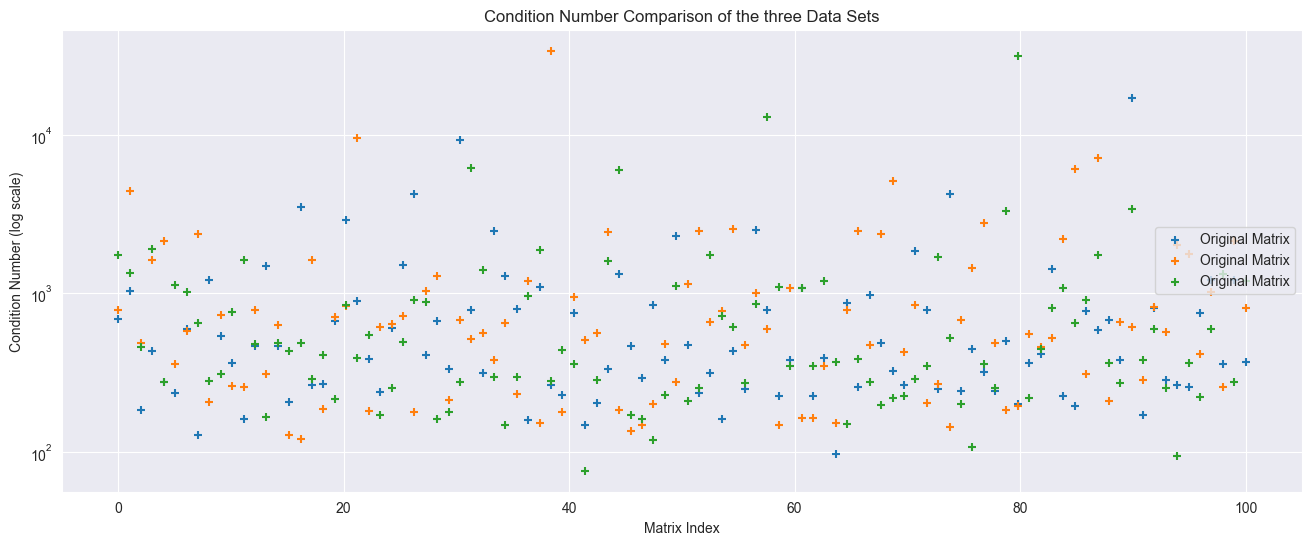

In [7]:
# Plot the condition number spreads of the matrices for the three sets
fig_cond_scatter = plt.figure(2, figsize=(16, 6))
x_vals = np.linspace(0, 100, num=NUMBER_OF_MATRICES)

# data for set1
set1_cond_nums = [np.linalg.cond(matrix_data_set1.matrices[i]) for i in range(matrix_data_set1.len)]
plt.scatter(x_vals, set1_cond_nums, label='Original Matrix', marker='+')
# data for set2
set2_cond_nums = [np.linalg.cond(matrix_data_set2.matrices[i]) for i in range(matrix_data_set2.len)]
plt.scatter(x_vals, set2_cond_nums, label='Original Matrix', marker='+')
# data for set3
set3_cond_nums = [np.linalg.cond(matrix_data_set3.matrices[i]) for i in range(matrix_data_set3.len)]
plt.scatter(x_vals, set3_cond_nums, label='Original Matrix', marker='+')

plt.xlabel('Matrix Index')
plt.ylabel('Condition Number (log scale)')
plt.gca().set_yscale('log')
plt.title('Condition Number Comparison of the three Data Sets')
plt.legend(loc='right')
plt.show()

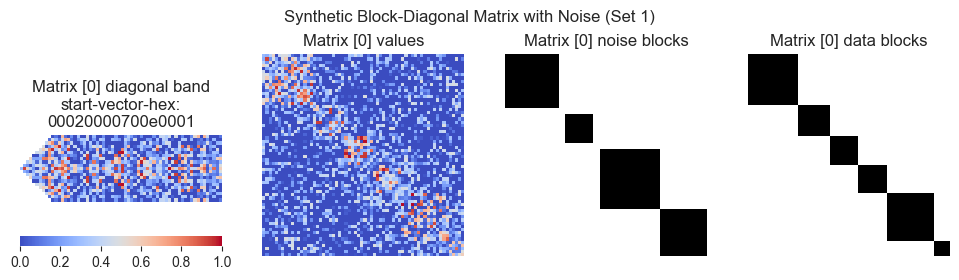

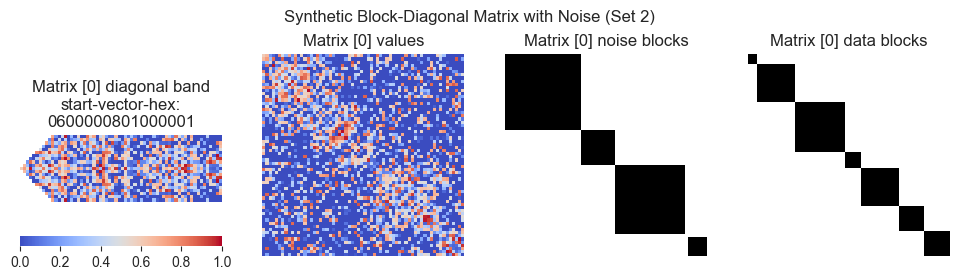

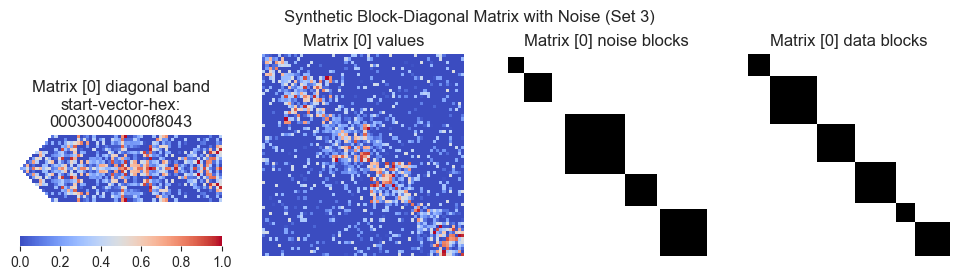

In [8]:
# define color bars and tick labels (e.g. 'rocket', 'rocket_r', 'viridis', 'flare', 'magma' ...)
mxl.plot.VALUE_COLORBAR = 'coolwarm'
mxl.plot.BLOCK_COLORBAR = "Greys"
fig_size=(12, 3)

# plot the matrix for set 1
fig_matrix_plot_set1 = plt.figure(num=3, figsize=fig_size)
sub_fig_shape: (int, int) = (1, 4)
indices_of_matrices_to_plot = [0]
mxl.plot.plot_matrices_and_metadata(fig_matrix_plot_set1, sub_fig_shape, indices_of_matrices_to_plot, matrix_data_set1)
_ = fig_matrix_plot_set1.suptitle("Synthetic Block-Diagonal Matrix with Noise (Set 1)")

# plot the matrix for set 2
fig_matrix_plot_set2 = plt.figure(num=4, figsize=fig_size)
sub_fig_shape: (int, int) = (1, 4)
indices_of_matrices_to_plot = [0]
mxl.plot.plot_matrices_and_metadata(fig_matrix_plot_set2, sub_fig_shape, indices_of_matrices_to_plot, matrix_data_set2)
_ = fig_matrix_plot_set2.suptitle("Synthetic Block-Diagonal Matrix with Noise (Set 2)")

# plot the matrix for set 1
fig_matrix_plot_set3 = plt.figure(num=5, figsize=fig_size)
sub_fig_shape: (int, int) = (1, 4)
indices_of_matrices_to_plot = [0]
mxl.plot.plot_matrices_and_metadata(fig_matrix_plot_set3, sub_fig_shape, indices_of_matrices_to_plot, matrix_data_set3)
_ = fig_matrix_plot_set3.suptitle("Synthetic Block-Diagonal Matrix with Noise (Set 3)")


In [9]:
# TODO: implement/copy from matrix_data_generation.ipynb

## Data Storage (Discarded)

To save the generated matrices we experimented with storing the data as images by casting the 32-bit float that represents a matrix cell to an RGB-alpha value consisting of four 8-bit integers.
While the results show that only minimal data loss occurs we decided to not use this feature as the data generation is not significantly time-consuming.

In [10]:
# We generate a single matrix for export/import
single_matrix = mxl.core.MatrixData(
    dimension=MATRIX_DIM, band_radius=DIAGONAL_BAND_RADIUS, sample_size=1,
    background_noise_value_properties=set1_bgr_noise_vp,
    block_noise_value_properties=set1_blk_noise_vp, block_noise_block_properties=set1_blk_noise_bp,
    block_data_value_properties=set1_blk_tdata_vp, block_data_block_properties=set1_blk_tdata_bp,
    seed=RNG_SEED, determinant_cutoff=DETERMINANT_CUTOFF, print_debug=False, band_padding_value=np.float32(np.NAN)
)

In [11]:
# NOTE: if you run this in google colab you might want to adjust the following parameters:
data_exchange_folder = "../data"

# Write the single matrix to disk, overwriting the autogenerated title
mxl.io.write_matrix_to_file(0, data_exchange_folder, single_matrix.matrices[0], single_matrix.noise_blk_starts[0],
                            single_matrix.metadata[0].bgr_noise_den, single_matrix.metadata[0].blk_noise_den,
                            single_matrix.metadata[0].blk_tdata_den, title="single_matrix_for_save_load_example")

# Store one matrix to compare with the back-loaded data later
comp = single_matrix.matrices[0]

diff min/max value: 0.0, -4.656612873077393e-10


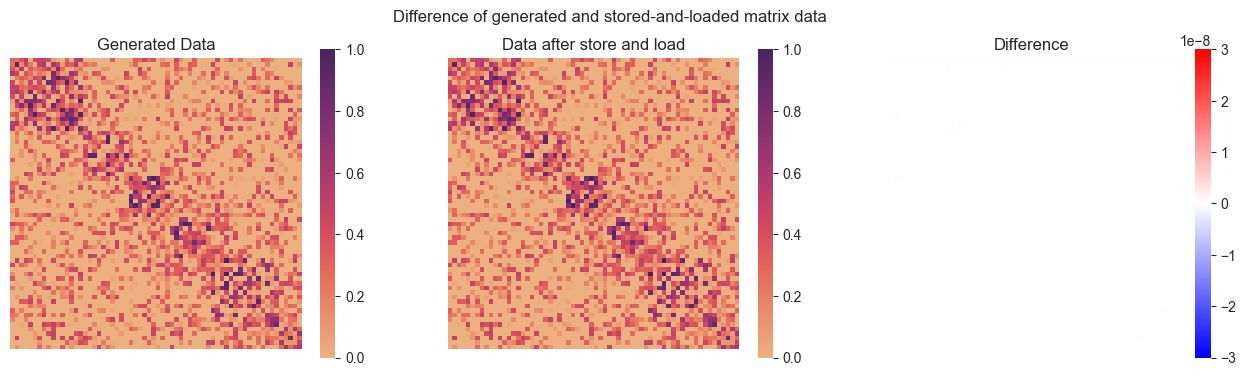

In [15]:
# Load one matrix to compare with the stored data from earlier
data = mxl.io.read_matrix_from_file(f"{data_exchange_folder}/single_matrix_for_save_load_example.png")

diff = data - comp

print(f"diff min/max value: {diff.max()}, {diff.min()}")

test_fig = plt.figure(num=2, figsize=(16, 4))
cmap = 'flare'
diff_cmap = "bwr"
sp1 = test_fig.add_subplot(1, 3, 1)
sp1.set_title('Generated Data')
sns.heatmap(data, xticklabels=False, yticklabels=False, cmap=cmap, square=True, vmin=0, vmax=1)
sp2 = test_fig.add_subplot(1, 3, 2)
sp2.set_title('Data after store and load')
sns.heatmap(comp, xticklabels=False, yticklabels=False, cmap=cmap, square=True, vmin=0, vmax=1)
sp3 = test_fig.add_subplot(1, 3, 3)
sp3.set_title('Difference')
sns.heatmap(diff, xticklabels=False, yticklabels=False, cmap=diff_cmap, square=True, vmin=-3e-8, vmax=+3e-8)
_ = test_fig.suptitle("Difference of generated and stored-and-loaded matrix data")
